In [1970]:
import requests
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import datetime as dt
tf.random.set_seed(0)
np.random.seed(0)
import random
random.seed(0)

In [1971]:
ticker = ["ONGC.NS"]
ONGC_Data = yf.download(ticker,start='2023-01-01',end='2023-07-16')
ONGC_Data = ONGC_Data['Open'].values.reshape(-1,1)

[*********************100%***********************]  1 of 1 completed


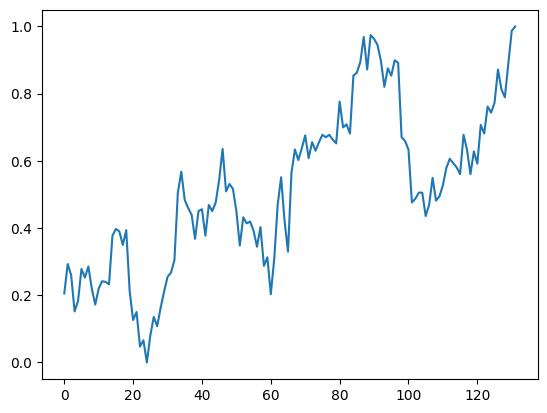

In [1972]:
open_price = ONGC_Data.astype('float32')
ss = MinMaxScaler(feature_range=(0,1))
open_price = ss.fit_transform(open_price)
plt.plot(open_price)

In [1973]:
train_size = round(len(open_price) * 0.66)
test_size = len(open_price) - train_size
train, test = open_price[:train_size], open_price[train_size:len(open_price)]

In [1974]:
def create_dataset(dataset, lookback):
    X, y = [], []

    for i in range(len(dataset)-lookback-1):
        X.append(dataset[i:i+lookback])
        y.append(dataset[i+lookback])
    
    return np.array(X), np.array(y)

In [1975]:
lookback = 8 # 8
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(78, 8, 1) (78, 1)
(36, 8, 1) (36, 1)


In [1976]:
dropout = 0.2

model = Sequential()
model.add(LSTM(10,input_shape=(lookback,1))) #10
model.add(Dropout(dropout))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,epochs=500,batch_size=32,verbose=2) #500 #32 82,74

Epoch 1/500
3/3 - 2s - loss: 0.1301 - 2s/epoch - 520ms/step
Epoch 2/500
3/3 - 0s - loss: 0.1077 - 11ms/epoch - 4ms/step
Epoch 3/500
3/3 - 0s - loss: 0.0810 - 8ms/epoch - 3ms/step
Epoch 4/500
3/3 - 0s - loss: 0.0620 - 10ms/epoch - 3ms/step
Epoch 5/500
3/3 - 0s - loss: 0.0643 - 6ms/epoch - 2ms/step
Epoch 6/500
3/3 - 0s - loss: 0.0540 - 8ms/epoch - 3ms/step
Epoch 7/500
3/3 - 0s - loss: 0.0468 - 9ms/epoch - 3ms/step
Epoch 8/500
3/3 - 0s - loss: 0.0320 - 8ms/epoch - 3ms/step
Epoch 9/500
3/3 - 0s - loss: 0.0308 - 9ms/epoch - 3ms/step
Epoch 10/500
3/3 - 0s - loss: 0.0300 - 7ms/epoch - 2ms/step
Epoch 11/500
3/3 - 0s - loss: 0.0288 - 8ms/epoch - 3ms/step
Epoch 12/500
3/3 - 0s - loss: 0.0243 - 9ms/epoch - 3ms/step
Epoch 13/500
3/3 - 0s - loss: 0.0390 - 8ms/epoch - 3ms/step
Epoch 14/500
3/3 - 0s - loss: 0.0258 - 10ms/epoch - 3ms/step
Epoch 15/500
3/3 - 0s - loss: 0.0222 - 7ms/epoch - 2ms/step
Epoch 16/500
3/3 - 0s - loss: 0.0265 - 10ms/epoch - 3ms/step
Epoch 17/500
3/3 - 0s - loss: 0.0208 - 10ms/

In [1977]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_pred = ss.inverse_transform(train_pred)
test_pred = ss.inverse_transform(test_pred)
y_train = ss.inverse_transform(y_train)
y_test = ss.inverse_transform(y_test)

train_rmse = np.round(np.sqrt(mean_squared_error(y_train,train_pred)),2)
test_rmse = np.round(np.sqrt(mean_squared_error(y_test,test_pred)),2)

train_acc = np.round(r2_score(y_train,train_pred),2)
test_acc = np.round(r2_score(y_test,test_pred),2)

print(f"Train RMSE : {train_rmse}, Train accuracy : {train_acc}")
print(f"Test RMSE : {test_rmse}, Test accuracy : {test_acc}")

2/2 [==============================] - 0s 2ms/step
Train RMSE : 2.299999952316284, Train accuracy : 0.82
Test RMSE : 2.0199999809265137, Test accuracy : 0.74


In [1978]:
# test_pred = np.copy(train_price[len(train_price)-lookback:])
# i = 0
# while i < y_test.shape[0]-lookback:
#     # print(f'Iteration {i+1}')
#     # print("--------------------")
#     # print("input :",test_pred[i:lookback+i])
#     # print("Test Price before append", test_pred)
#     y_test = 
#     tmp = model.predict(test_pred[i:lookback+i].reshape(1,lookback,1))
#     # print("predicted tmp :", tmp)
#     test_pred=np.append(test_pred,tmp)
#     # print("Test Price after append", test_pred)
#     # print("--------------------")
#     i+=1

In [1979]:
# train_pred = model.predict(X_train)
# test_pred = model.predict(X_test)
# train_pred = ss.inverse_transform(train_pred)
# test_pred = ss.inverse_transform(test_pred)
# y_train = ss.inverse_transform(y_train)
# y_test = ss.inverse_transform(y_test)

# train_rmse = np.round(np.sqrt(mean_squared_error(y_train,train_pred)),2)
# test_rmse = np.round(np.sqrt(mean_squared_error(y_test,test_pred)),2)

# train_acc = np.round(r2_score(y_train,train_pred),2)
# test_acc = np.round(r2_score(y_test,test_pred),2)

# print(f"Train RMSE : {train_rmse}, Train accuracy : {train_acc}")
# print(f"Test RMSE : {test_rmse}, Test accuracy : {test_acc}")

In [1980]:
# X_test = []
# test_price = np.copy(train_price[len(train_price)-lookback:])
# i = 0
# while i < 10-lookback:
#     print(f'Iteration {i+1}')
#     print("--------------------")
#     print("input :",test_price[i:lookback+i])
#     print("Test Price before append", test_price)
#     tmp = model.predict(test_price[i:lookback+i].reshape(1,lookback,1))
#     print("predicted tmp :", tmp)
#     test_price=np.append(test_price,tmp)
#     print("Test Price after append", test_price)
#     print("--------------------")
#     i+=1
# print(test_price)

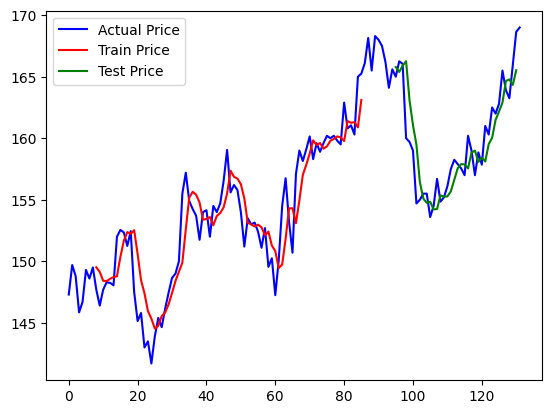

In [1981]:
# shift train predictions for plotting
train_plot = np.ones_like(ONGC_Data) * np.nan
# print(len(train_pred))
# print(train_plot.shape)
# print(train_pred.shape)
open_price = ss.inverse_transform(open_price)
train_plot[lookback:train_size-1] = train_pred
# shift test predictions for plotting
test_plot = np.ones_like(ONGC_Data.reshape(-1,1)) * np.nan
test_plot[train_size+lookback:ONGC_Data.shape[0]-1] = test_pred.reshape(-1,1)
# plot
plt.plot(open_price, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.legend(['Actual Price', 'Train Price', 'Test Price'])
#print(test_plot[75:])
#print(open_price)
plt.show()

## Appendix

In [1989]:
y_test[-1],open_price[-2],test_pred[-1]

(array([168.65], dtype=float32),
 array([168.65], dtype=float32),
 array([165.52629], dtype=float32))

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/